In [252]:
import pandas as pd

In [253]:
import matplotlib.pyplot as plt
%matplotlib inline

### 1. load file

In [255]:
# if you have local file
# cumtomerComplaint = pd.read_csv('Consumer_Complaint0s.csv')
cumtomerComplaint = pd.read_csv('https://data.consumerfinance.gov/api/views/s6ew-h6mp/rows.csv?accessType=DOWNLOAD')

In [256]:
cumtomerComplaint

Date received                  Product  \
0         03/12/2014                 Mortgage   
1         10/01/2016         Credit reporting   
2         10/17/2016            Consumer Loan   
3         06/08/2014              Credit card   
4         09/13/2014          Debt collection   
5         11/13/2013                 Mortgage   
6         06/16/2015          Debt collection   
7         06/15/2015         Credit reporting   
8         11/13/2015                 Mortgage   
9         10/21/2014                 Mortgage   
10        04/14/2017                 Mortgage   
11        03/30/2012             Student loan   
12        02/03/2016          Debt collection   
13        01/07/2015         Credit reporting   
14        03/15/2013              Credit card   
15        07/18/2016         Credit reporting   
16        02/17/2016          Debt collection   
17        11/07/2014                 Mortgage   
18        04/17/2015                 Mortgage   
19        03/09/2016         Credit reporting   
20        02/04/2015          Debt collection   
21        03/17/2017  Bank account or service   
22        03/08/2012                 Mortgage   
23        03/27/2013                 Mortgage   
24        02/25/2014          Debt collection   
25        11/18/2016                 Mortgage   
26        07/16/2015                 Mortgage   
27        11/03/2015          Debt collection   
28        08/09/2016         Credit reporting   
29        04/27/2016                 Mortgage   
...              ...                      ...   
910030    11/13/2013              Credit card   
910031    03/05/2016             Student loan   
910032    07/28/2014                 Mortgage   
910033    10/21/2015              Credit card   
910034    05/05/2016             Student loan   
910035    03/25/2014  Bank account or service   
910036    08/17/2016                 Mortgage   
910037    04/11/2014  Bank account or service   
910038    01/26/2017          Debt collection   
910039    11/15/2012                 Mortgage   
910040    03/19/2017  Bank account or service   
910041    12/01/2016          Debt collection   
910042    02/27/2017          Debt collection   
910043    09/07/2016  Bank account or service   
910044    03/16/2017  Bank account or service   
910045    03/23/2017  Bank account or service   
910046    11/22/2016                 Mortgage   
910047    01/18/2017          Debt collection   
910048    04/28/2015                 Mortgage   
910049    09/12/2012  Bank account or service   
910050    09/17/2015              Credit card   
910051    02/11/2014              Credit card   
910052    11/09/2016          Debt collection   
910053    01/22/2016  Bank account or service   
910054    01/26/2017          Debt collection   
910055    04/10/2017          Debt collection   
910056    02/07/2017          Debt collection   
910057    01/04/2017                 Mortgage   
910058    09/28/2015          Debt collection   
910059    08/19/2016          Debt collection   

                                   Sub-product  \
0                               Other mortgage   
1                                          NaN   
2                                 Vehicle loan   
3                                          NaN   
4                                  Credit card   
5       Conventional adjustable mortgage (ARM)   
6                                      Medical   
7                                          NaN   
8                               Other mortgage   
9                  Conventional fixed mortgage   
10                              Other mortgage   
11                    Non-federal student loan   
12       Other (i.e. phone, health club, etc.)   
13                                         NaN   
14                                         NaN   
15                                         NaN   
16                                 Credit card   
17                 Conventional fixed mortgage   
18                

### 2. compute

In [257]:
cumtomerComplaintReduce = cumtomerComplaint.loc[:,['Date received','Product']]

In [258]:
cumtomerComplaintReduce['Date received'] = pd.to_datetime(cumtomerComplaintReduce['Date received'])

In [259]:
cumtomerComplaintReduce['Date received'] = cumtomerComplaintReduce['Date received'].apply(lambda x: x.year)

In [260]:
cumtomerComplaintReduce

Date received                  Product
0                2014                 Mortgage
1                2016         Credit reporting
2                2016            Consumer Loan
3                2014              Credit card
4                2014          Debt collection
5                2013                 Mortgage
6                2015          Debt collection
7                2015         Credit reporting
8                2015                 Mortgage
9                2014                 Mortgage
10               2017                 Mortgage
11               2012             Student loan
12               2016          Debt collection
13               2015         Credit reporting
14               2013              Credit card
15               2016         Credit reporting
16               2016          Debt collection
17               2014                 Mortgage
18               2015                 Mortgage
19               2016         Credit reporting
20               2015          Debt collection
21               2017  Bank account or service
22               2012                 Mortgage
23               2013                 Mortgage
24               2014          Debt collection
25               2016                 Mortgage
26               2015                 Mortgage
27               2015          Debt collection
28               2016         Credit reporting
29               2016                 Mortgage
...               ...                      ...
910030           2013              Credit card
910031           2016             Student loan
910032           2014                 Mortgage
910033           2015              Credit card
910034           2016             Student loan
910035           2014  Bank account or service
910036           2016                 Mortgage
910037           2014  Bank account or service
910038           2017          Debt collection
910039           2012                 Mortgage
910040           2017  Bank account or service
910041           2016          Debt collection
910042           2017          Debt collection
910043           2016  Bank account or service
910044           2017  Bank account or service
910045           2017  Bank account or service
910046           2016                 Mortgage
910047           2017          Debt collection
910048           2015                 Mortgage
910049           2012  Bank account or service
910050           2015              Credit card
910051           2014              Credit card
910052           2016          Debt collection
910053           2016  Bank account or service
910054           2017          Debt collection
910055           2017          Debt collection
910056           2017          Debt collection
910057           2017                 Mortgage
910058           2015          Debt collection
910059           2016          Debt collection

[910060 rows x 2 columns]

In [261]:
cumtomerComplaintReduce = cumtomerComplaintReduce.sort_values(by="Date received")

In [262]:
yearList = cumtomerComplaintReduce.groupby('Date received').count().index

In [263]:
productList = cumtomerComplaintReduce.groupby('Product').count().index

In [264]:
result = {
  'Bank account or service': [],
  'Checking or savings account': [],
  'Consumer Loan': [],
  'Credit card': [],
  'Credit card or prepaid card': [],
  'Credit reporting': [],
  'Credit reporting, credit repair services, or other personal consumer reports': [],
  'Debt collection': [],
  'Money transfer, virtual currency, or money service': [],
  'Money transfers': [],
  'Mortgage': [],
  'Other financial service': [],
  'Payday loan': [],
  'Payday loan, title loan, or personal loan': [],
  'Prepaid card': [],
  'Student loan': [],
  'Vehicle loan or lease': [],
  'Virtual currency': []
}

In [265]:
for product in productList:
  oldYear = 0
  for row in cumtomerComplaintReduce.iterrows():
    if oldYear != row[1]['Date received']:
        oldYear = row[1]['Date received']
        result[product].append(0)
    if row[1]['Product'] == product:
        last = len(result[product]) - 1
        result[product][last] = result[product][last] + 1 

In [266]:
cumtomerComplaintByProductName = pd.DataFrame(result, index=yearList)

In [267]:
cumtomerComplaintByProductName

Bank account or service  Checking or savings account  \
Date received                                                         
2011                                 0                            0   
2012                             12212                            0   
2013                             13388                            0   
2014                             14662                            0   
2015                             17140                            0   
2016                             21849                            0   
2017                              6956                        10370   

               Consumer Loan  Credit card  Credit card or prepaid card  \
Date received                                                            
2011                       0         1260                            0   
2012                    1986        15353                            0   
2013                    3117        13105                            0   
2014                    5457        13974                            0   
2015                    7888        17300                            0   
2016                    9602        21066                            0   
2017                    3557         7132                        12484   

               Credit reporting  \
Date received                     
2011                          0   
2012                       1873   
2013                      14380   
2014                      29239   
2015                      34273   
2016                      44081   
2017                      16578   

               Credit reporting, credit repair services, or other personal consumer reports  \
Date received                                                                                 
2011                                                           0                              
2012                                                           0                              
2013                                                           0                              
2014                                                           0                              
2015                                                           0                              
2016                                                           0                              
2017                                                       61807                              

               Debt collection  \
Date received                    
2011                         0   
2012                         0   
2013                     11069   
2014                     39148   
2015                     39757   
2016                     40487   
2017                     42292   

               Money transfer, virtual currency, or money service  \
Date received                                                       
2011                                                           0    
2012                                                           0    
2013                                                           0    
2014                                                           0    
2015                                                           0    
2016                                                           0    
2017                                                        2338    

               Money transfers  Mortgage  Other financial service  \
Date received                                                       
2011                         0      1276                        0   
2012                         0     38109                        0   
2013                       559     49401                        0   
2014                      1169     42962                      116   
2015                      1619     42353                      312   
2016                      1567     41471                      466   
2017                       440     27276               

### 3. plot

In [268]:
cumtomerComplaintByProductName = cumtomerComplaintByProductName.cumsum()

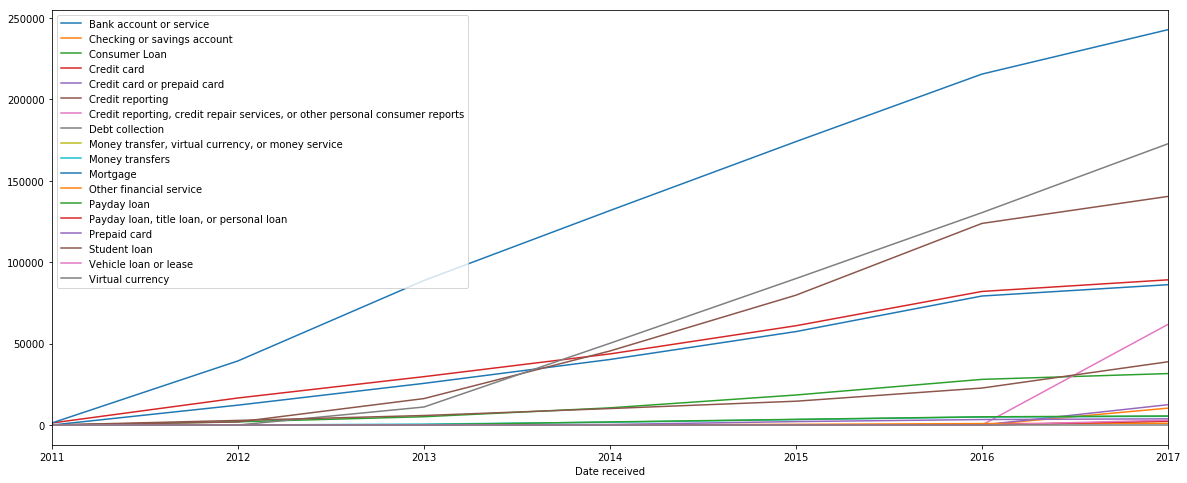

In [269]:
cumtomerComplaintByProductName.plot(figsize=(20,8))